#                       Mnist classification with keras



    In this project we will see how to create a mnist data digit classifer with keras.

In [39]:
from keras.datasets import mnist
import keras.utils.np_utils as ku
import keras.models as models
import keras.layers as layers
from keras import regularizers

from keras.optimizers import rmsprop
#import numpy.random as nr
#from tensorflow import set_random_seed

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


## Load Data and explore

In [40]:
(train_images, train_labels),(test_images, test_labels)=mnist.load_data()

In [41]:
print(train_images[4].shape)

(28, 28)


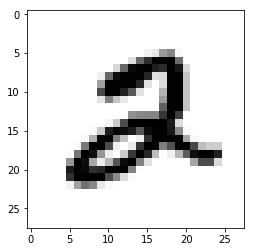

Label = 2


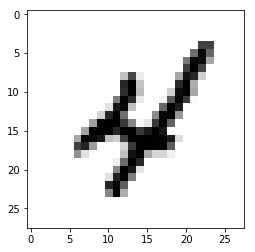

Label = 4


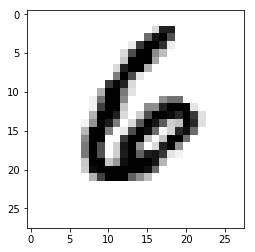

Label = 6


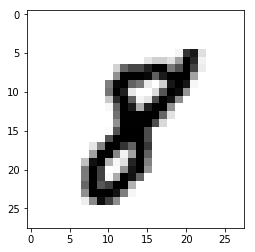

Label = 8


In [46]:
# display 4 of 60000 images with their labels
for i in range(5,20,4):
    plt.imshow(train_images[i], cmap = plt.cm.binary)
    plt.show()
    print('Label = ' + str(train_labels[i]))

## Prepare image data for training

* Flatten the images and convert pixel values to standardized floating point number.

In [8]:
# we have 60000 train images and 10000 test images

print(train_images.shape, train_labels.shape)
train_images = train_images.reshape(60000, 28*28).astype('float32')/255
print(train_images.shape)
print(train_images.dtype)

(60000, 28, 28) (60000,)
(60000, 784)
float32


* Apply same transformation to test dataset.

In [10]:
print(test_images.shape, test_labels.shape)
test_images = test_images.reshape(10000, 28*28).astype('float32')/255
print(test_images.shape)


(10000, 28, 28) (10000,)
(10000, 784)


In [12]:
print(train_labels[5:,])

[2 1 3 ... 5 6 8]


* Labels above are integers, we need catagorical values. Here, we can use keras to_categorical method of keras.utils.np_utils to do this.

In [13]:
# one hot encode train and test labels
train_labels = ku.to_categorical(train_labels)
print(train_labels[5:,])

[[0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


In [14]:
test_labels = ku.to_categorical(test_labels)

## Define a sequential model

* We need 10 units since there are 10 categories (digits 0 to 9) of the model we are classifing.
* This is multinomial classification problem, using softmax activation.

In [16]:
nn= models.Sequential()
nn.add(layers.Dense(512, activation = 'relu', input_shape = (28*28,)))
nn.add(layers.Dense(10, activation = 'softmax'))


Instructions for updating:
Colocations handled automatically by placer.


## Train and evaluate a sequential model

First, we need to:
* Compile and execute our model
* Specify a optimizer
* Specify a loss function (in this case, we have multinomial classification - so using categorical_crossentropy)
* Specify one (or more) metric used to evaluate performance of the model)


In [19]:
nn.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

Now our model is ready to be trained using fit method with arguments:
* Training features
* Training labels (as this is a supervised ml model)
* Number of epochs (iterations)
* Batch size (used for optimizer)

In [20]:
nn.fit(train_images, train_labels, epochs =5, batch_size =128)

Epoch 1/5
60000/60000 [==============================] - 7s 122us/step - loss: 0.2588 - accuracy: 0.9255
Epoch 2/5
60000/60000 [==============================] - 5s 81us/step - loss: 0.1038 - accuracy: 0.9693
Epoch 3/5
60000/60000 [==============================] - 5s 83us/step - loss: 0.0679 - accuracy: 0.9803
Epoch 4/5
60000/60000 [==============================] - 5s 79us/step - loss: 0.0494 - accuracy: 0.9855
Epoch 5/5
60000/60000 [==============================] - 5s 78us/step - loss: 0.0364 - accuracy: 0.9893


In [22]:
# Test the model we built

nn.evaluate(test_images, test_labels)

10000/10000 [==============================] - 1s 55us/step


[0.06961160766235552, 0.9785000085830688]

## Training over epochs

In order to determine at what point a model is overfit during training it is necessary to evaluate the model after each training epoch. A history object is created which contains the history of various metrics during the training or fitting process.

In [24]:
## Define a sequential model and print a summary
nnt = models.Sequential()
nnt.add(layers.Dense(512, activation = 'relu', input_shape = (28*28, )))
nnt.add(layers.Dense(10, activation = 'softmax'))
nnt.summary()

## Compile the model. 
nnt.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', 
                metrics = ['accuracy'])
 
## Fit the model saving the results to a history file    
#nr.seed(4678)
#set_random_seed(8866)
history = nnt.fit(train_images, train_labels, 
                  epochs = 10, batch_size = 128,
                  validation_data = (test_images, test_labels))

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_6 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 101us/step - loss: 0.2563 - accuracy: 0.9264 - val_loss: 0.1274 - val_accuracy: 0.9636
Epoch 2/10
60000/60000 [==============================] - 6s 103us/step - loss: 0.1034 - accuracy: 0.9696 - val_loss: 0.0874 - val_accuracy: 0.9735
Epoch 3/10
60000/60000 [==============================] - 5s 89us/step - loss: 0.0680 - accuracy: 0.9790 - val_loss: 0.0828 - val_accuracy: 0.9740
Epoch 4/10
60000/

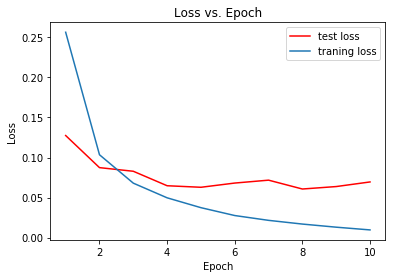

In [25]:
def plot_loss(history):
    train_loss = history.history['loss']
    test_loss = history.history['val_loss']
    x = list(range(1, len(test_loss) + 1))
    plt.plot(x, test_loss, color = 'red', label = 'test loss')
    plt.plot(x, train_loss, label = 'traning loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Loss vs. Epoch')
    plt.legend()
    
plot_loss(history)

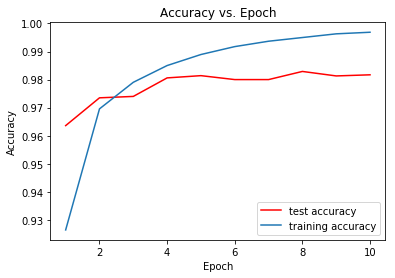

In [28]:
def plot_accuracy(history):
    train_acc = history.history['accuracy']
    test_acc = history.history['val_accuracy']
    x = list(range(1, len(test_acc) + 1))
    plt.plot(x, test_acc, color = 'red', label = 'test accuracy')
    plt.plot(x, train_acc, label = 'training accuracy')  
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Accuracy vs. Epoch')  
    plt.legend(loc='lower right')
    
plot_accuracy(history)


Notice that the training loss and accuracy continue to improve throughout the epochs. However, the evaluation loss and accuracy only improve significantly for the first four, or perhaps 5, epochs. This is clear evidence that subsequent epochs are simply over-fitting the model.

## Add hidden layers

Define a model similar to the first one, but with a second layer defined. Notice that the definition of the two layer model is nearly the same as for the single layer model. In this case, the second layer has the same number of units and activation function as the first.

However, notice that the input_shape does not need to be defined for hidden layers past the first. Keras will determine the dimensions of tensors passed between layers beyond the input

In [29]:
## Define a sequential model
nnt = models.Sequential()
nnt.add(layers.Dense(512, activation = 'relu', input_shape = (28*28, )))
nnt.add(layers.Dense(512, activation = 'relu'))
nnt.add(layers.Dense(10, activation = 'softmax'))
nnt.summary()

## Compile the model
nnt.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', 
                metrics = ['accuracy'])
    
## Fit the model, saving the results to a history file.     
#nr.seed(2432)
#set_random_seed(5544)
history = nnt.fit(train_images, train_labels, 
                  epochs = 20, batch_size = 128,
                  validation_data = (test_images, test_labels))

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_8 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_9 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 9s 153us/step - loss: 0.2178 - accuracy: 0.9328 - val_loss: 0.1440 - val_accuracy: 0.9522
Epoch 2/20
60000/60000 [==============================] - 9s 144us/step - loss: 0.0826 - accuracy: 0.9749 - val_loss: 0.0968 - val_accuracy: 0.9706
Epoch 3/20
60000/60000 [========

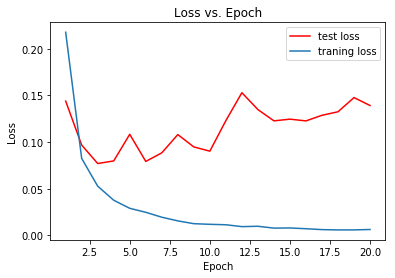

In [30]:
plot_loss(history)

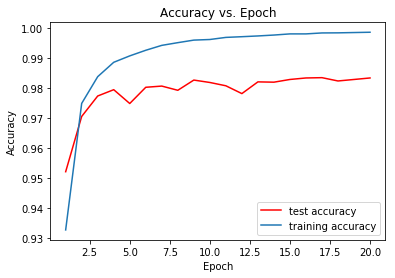

In [31]:
plot_accuracy(history)

Notice that after epoch four the true (test) loss actually increases, whereas the training loss continues to decrease. This is a clear indication of overfitting.

## Add regularization to the model

Regularization is used to prevent over-fitting of machine learning models including neural networks. The Keras regularizers package provides L1 and L2 regularization methods. The theory of regularization will be addressed in other lessons. In addition you can find documentation on the Keras regularizers package.

The code in the cell below adds the kernel_regularizer argument with the value of regularizers.l2(0.01) This adds a weight decay penalty of 0.01 to the model weights.

In [34]:
## Difine the layers of the sequential model and print a summary
nnt = models.Sequential()
nnt.add(layers.Dense(512, activation = 'relu', input_shape = (28*28, ),
                        kernel_regularizer=regularizers.l2(0.001)))
nnt.add(layers.Dense(512, activation = 'relu', kernel_regularizer=regularizers.l2(0.001)))
nnt.add(layers.Dense(10, activation = 'softmax'))
nnt.summary()

## Define an optimzer object and compile the model
optimizer = rmsprop()
nnt.compile(optimizer = optimizer, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
## Fit the compiled model    
#nr.seed(8765)
#set_random_seed(7654)
history = nnt.fit(train_images, train_labels, 
                  epochs = 20, batch_size = 128,
                  validation_data = (test_images, test_labels))

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_14 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_15 (Dense)             (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 12s 194us/step - loss: 0.6359 - accuracy: 0.9228 - val_loss: 0.3434 - val_accuracy: 0.9487
Epoch 2/20
60000/60000 [==============================] - 11s 176us/step - loss: 0.2644 - accuracy: 0.9611 - val_loss: 0.2867 - val_accuracy: 0.9424
Epoch 3/20
60000/60000 [======

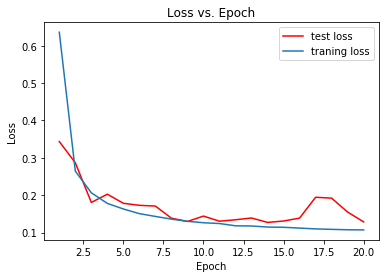

In [35]:
plot_loss(history)

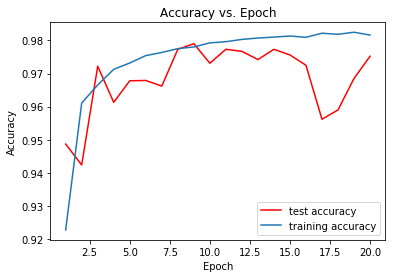

In [36]:
plot_accuracy(history)

Notice here in regularized model, accuracy increases up to epochs 9. By using regularization we can increase iterations without overfitting up to 9 iterations (initially it was 4).